In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
from scipy.ndimage.filters import gaussian_filter
import matplotlib.image as mpimg
import pickle

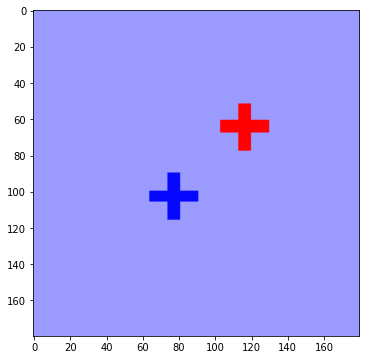

(180, 180, 4)

In [27]:
fig1 = plt.figure(figsize=(12, 6))
img=mpimg.imread('../DENISE-Benchmark/2_cross_TE_model/model/2_cross_TE_model.png')
imgplot = plt.imshow(img)
plt.show()
np.shape(img)

In [3]:
NY, NX, tmp = np.shape(img)
tmp=None
DH = 0.07

In [4]:
npara = 3  # number of model parameters

# allocate memory
R = np.ones((npara,1))
G = np.ones((npara,1))
B = np.ones((npara,1))
sigma = np.ones((npara,1))
epsilonr = np.ones((npara,1))

# link colors in the image with material parameters
R = (img[2,2][0], img[64,115][0], img[104,77][0])
G = (img[2,2][1], img[64,115][1], img[104,77][1])
B = (img[2,2][2], img[64,115][2], img[104,77][2])

sigma = (3.0, 10.0, 0.1)
epsilonr = (4.0, 8.0, 1.0)

In [5]:
sigma0 = 1000.0 * np.ones((NY,NX))
epsilonr0 = np.ones((NY,NX))

# loop over image and replace colors by model parameters
for j in range(0,NY,1):
    
    for i in range(0,NX,1):
        
        for k in range(npara):
            
            if img[j,i][0] == R[k] and img[j,i][1] == G[k] and  img[j,i][2] == B[k]:
            
                sigma0[j,i] = sigma[k]
                epsilonr0[j,i] = epsilonr[k]                

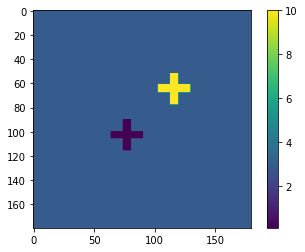

In [7]:
plt.imshow(sigma0)
plt.colorbar()

<Figure size 14400x14400 with 0 Axes>

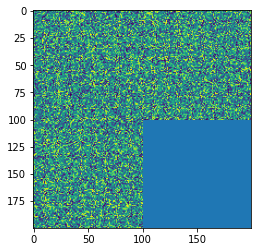

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

plt.figure(figsize=(200,200))
arr = np.random.rand(200,200)

fig,ax = plt.subplots(1)

ax.imshow(arr)
rect = patches.Rectangle((100, 100), 100, 100, fill=True)
ax.add_patch(rect)
plt.show()
fig.savefig('../DENISE-Benchmark/2_cross_TE_model/model/2_cross_TE_model_triangle.png')

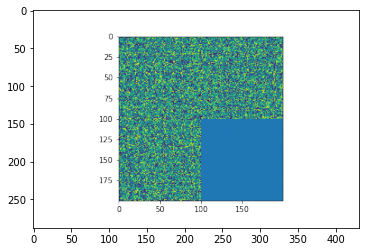

(288, 432, 4)

In [53]:
#fig1 = plt.figure(figsize=(12, 6))
img=mpimg.imread('../DENISE-Benchmark/2_cross_TE_model/model/2_cross_TE_model_triangle.png')
imgplot = plt.imshow(img)
plt.show()
np.shape(img)

In [37]:
mu = 1000.0 * np.ones((NY,NX))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
plt.figure(figsize=(180, 180))
plt.axis('equal')
pts = np.array([[20,20], [40,20], [30,10]])
#pts = np.array([[2,2], [4,2], [3,1]])
p = Polygon(pts, closed=False, facecolor='g')
ax = plt.gca()
ax.add_patch(p)
ax.set_xlim(0,NX)
ax.set_ylim(0,NY)
ax.set_aspect(1)
plt.show()
plt.savefig('../DENISE-Benchmark/2_cross_TE_model/model/2_cross_TE_model_triangle.png')
#plt.colorbar()


<Figure size 432x288 with 0 Axes>

In [36]:
x = np.arange(0, 40, 0.2)
axs['patches'].fill_between(x, np.sin(x) * 4 + 30, y2=0,
                            hatch='///', zorder=2, fc='c')
axs['patches'].add_patch(Ellipse((4, 50), 10, 10, fill=True,
                                 hatch='*', facecolor='y'))
axs['patches'].add_patch(Polygon([(10, 20), (30, 50), (50, 10)],
                                 hatch='\\/...', facecolor='g'))
axs['patches'].set_xlim([0, 40])
axs['patches'].set_ylim([10, 60])
axs['patches'].set_aspect(1)
plt.show()

NameError: name 'axs' is not defined

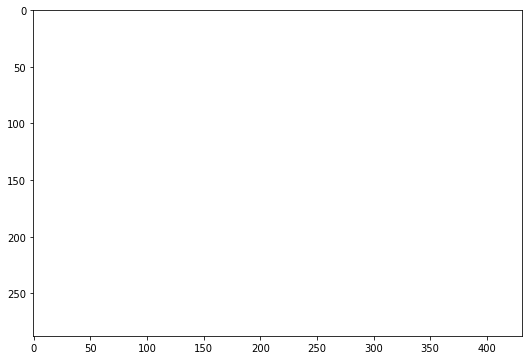

(288, 432, 4)

In [38]:
fig1 = plt.figure(figsize=(12, 6))
img=mpimg.imread('../DENISE-Benchmark/2_cross_TE_model/model/2_cross_TE_model_triangle.png')
imgplot = plt.imshow(img)
plt.show()
np.shape(img)

In [22]:
NY

180

In [12]:
pts

array([[2.        , 2.        ],
       [4.        , 2.        ],
       [3.        , 4.58257569]])

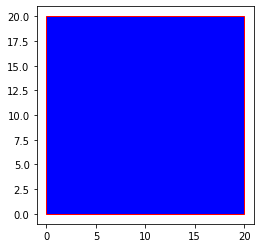

In [10]:
import matplotlib.pyplot as plt
plt.axes()
rectangle = plt.Rectangle((0,0), 20, 20, fc='blue',ec="red")
plt.gca().add_patch(rectangle)
plt.axis('scaled')
plt.show()

In [ ]:
def do_plot(n, model, cm, an, title, vpmin, vpmax):
    
    ax=plt.subplot(1, 2, n)
    
    #plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    ## for Palatino and other serif fonts use:
    #rc('font',**{'family':'serif','serif':['Palatino']})
    #plt.rc('text', usetex=True)
    rc('text', usetex=True)
    
    plt.imshow(model, cmap=cm, interpolation='none', extent=[DH,NX*DH,DH,NY*DH], vmin=vpmin, vmax=vpmax)
    a = gca()
    #a.set_xticklabels(a.get_xticks(), font)
    #a.set_yticklabels(a.get_yticks(), font)
    #plt.axis('scaled')
    plt.ylabel('Depth [m]')
    plt.xlabel('Distance [m]')
    plt.gca().invert_yaxis()
    cbar=plt.colorbar(aspect=8, pad=0.05)
    cbar.set_label(title, fontdict=font, labelpad=10)
    plt.text(0.8, 1.5,an,fontdict=font,color='white')
    plt.tight_layout()

In [ ]:
plt.close('all')
plt.figure()
do_plot(1, np.flipud(sigma0), 'seismic', '(a)', r"$\rm{\sigma [mS/m]}$", np.min(sigma0), np.max(sigma0))
do_plot(2, np.flipud(epsilonr0), 'seismic', '(b)', r"$\rm{\epsilon_r []}$", np.min(epsilonr0), np.max(epsilonr0))
#plt.savefig('test.png', format='png', dpi=100)
plt.savefig('2_cross_TE_model_true.pdf', bbox_inches='tight', format='pdf')
plt.show()